In [2]:
import numpy as np
import matplotlib.pyplot as plt

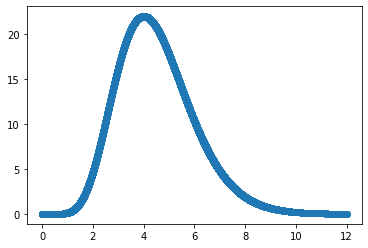

In [3]:
# Consider (unnormalized) Gamma density with shape parameter 9 and scale parameter 1/2
# Support is (0, inf) but image restricts to (0, 12)

gamma_shape = 9
gamma_scale = 0.5

# Defines gamma with the specified parameters; vectorized.
def gamma(x):
    return np.power(x, gamma_shape - 1) * np.exp(-2 * x)

num_x_samples = 10000
x_vals = np.arange(0, 12, step = 12 / num_x_samples)
plt.scatter(x = x_vals, 
            y = gamma(x_vals))
plt.show()


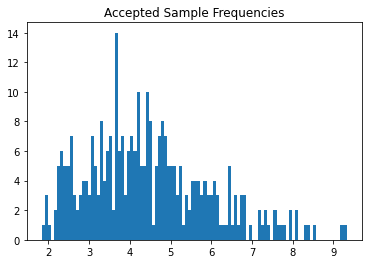

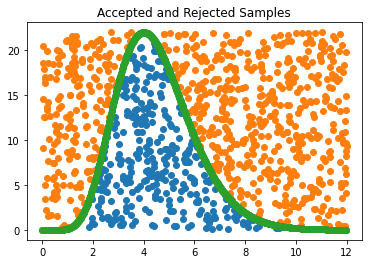

Fraction accepted (empirical):  0.312
Probability of acceptence (theoretical):  0.045454545454545456


In [9]:
# Basic Accept-Reject reject algorithm with constant upper bound. Here we consider the upper 
# bound M on the truncated support [0, 12]. Thus, no samples will be generated on (12, inf). 
# Since very little of the probability mass occurs on this interval, the method should provide 
# a reasonable approximation. 

# Maximum occurs at x = 4
M = np.ceil(gamma(4))

# Support upper bound
support_bound = 12

# Rejection sampling
accepted_samples = []
rejected_samples = []
num_iter = 1000

for i in range(num_iter):
    x = np.random.uniform(0, support_bound)
    u = np.random.uniform(0, 1)
    if u < gamma(x) / M:
        accepted_samples.append((x, u))
    else:
        rejected_samples.append((x, u))
        
x_samples = [sample[0] for sample in accepted_samples]
        
# Plot results
plt.hist(x_samples, bins = 100)
plt.title("Accepted Sample Frequencies")
plt.show()
plt.close()

# Superimpose (x, u) sample pairs on density plot
plt.scatter(x = [sample[0] for sample in accepted_samples], 
            y = [sample[1] * M for sample in accepted_samples])
plt.scatter(x = [sample[0] for sample in rejected_samples], 
            y = [sample[1] * M for sample in rejected_samples])

num_x_samples = 1000
x_vals = np.arange(0, 12, step = 12 / num_x_samples)
plt.scatter(x = x_vals, 
            y = gamma(x_vals))
plt.title("Accepted and Rejected Samples")
plt.show()
plt.close()

# Efficiency results
print("Fraction accepted (empirical): ", str(len(accepted_samples) / num_iter))
print("Probability of acceptence (theoretical): ")





